> 本节课学习激活函数，链式求导（反向传播的理论基础之一），并补充拟合、优化器等概念

上一节课我们实现了利用均方误差梯度下降的方式的机器学习，也解释了相关概念，但如何在线性模型的基础上进一步解决分类问题？这就需要用到激活函数。

## 数学基础

本节课需要用到的数学基础是sigmoid函数，并把前一节课中的求导法则中的链式法则重点实战进一步了解反向传播和梯度下降。

### Sigmoid函数

sigmoid函数是一种常用的数学函数，其公式为：

$$\sigma(x) = \frac{1}{1+e^{-x}}$$

其中，x为自变量，$\sigma(x)$为因变量，e为自然常数。

sigmoid函数的图像为一条S形曲线，其取值范围为(0,1)。在机器学习和神经网络中，sigmoid函数常用来作为激活函数，用于将输入信号映射到0到1之间的概率值，以进行分类或回归等任务。

sigmoid函数具有以下性质：

1. 在x=0处，sigmoid函数的取值为0.5。

2. 随着x的增大，sigmoid函数的取值趋近于1。

3. 随着x的减小，sigmoid函数的取值趋近于0。

4. sigmoid函数在x=正无穷和x=负无穷处的取值分别为1和0。

5. sigmoid函数在x=0处的导数最大，且导数值为0.25，这使得它在反向传播算法中常用于计算误差梯度。导数：$$f'(x) = \frac{e^{-x}}{(1 + e^{-x})^2}$$


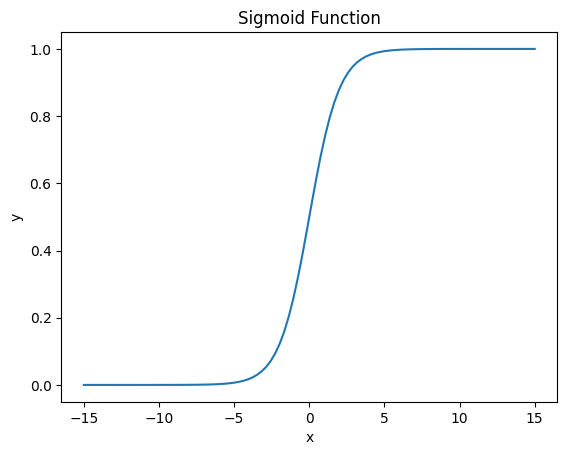

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 定义Sigmoid函数
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# 生成横坐标数据
x = np.linspace(-15, 15, 100)

# 计算纵坐标数据
y = sigmoid(x)

# 绘制函数图像
plt.plot(x, y)
plt.title('Sigmoid Function')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### 链式法则

求导的链式法则是导数运算中的一种规则，适用于复合函数求导。

复合函数 $y = f(g(x))$ 对 $x$ 的导数为：

$$ (f(g(x)))'=f'(g(x))\cdot g'(x) $$

设有函数 $y = f(u)$ 和 $u = g(x)$，则根据链式法则：

$$\frac{dy}{dx} = \frac{dy}{du} \cdot \frac{du}{dx}$$

其中，$\frac{dy}{du}$ 表示外层函数 $f(u)$ 对内层变量 $u$ 的导数，$\frac{du}{dx}$ 表示内层函数 $g(x)$ 对自变量 $x$ 的导数。

换句话说，求导的链式法则指导我们先求每个变量的导数，然后按照一定的规则结合起来求解复合函数的导数。

例如，若 $y = (3x^2 + 2x + 1)^3$，则可以看成是两个函数的复合，一个内层函数 $u = 3x^2 + 2x + 1$，一个外层函数 $y = u^3$。应用链式法则，我们可以得到 $\frac{dy}{dx} = \frac{dy}{du} \cdot \frac{du}{dx} = 3u^2 * (6x+2)$，代入原式中即可求得 y 对 x 的导数。




$$z = wx + b$$

$$y = \frac{1}{1+e^{-z}} = sigmoid(z)$$

其中，$x$是输入特征，$w$是权重，$b$是偏置。我们的目标是学习最佳的权重和偏置，使得模型的预测结果尽可能接近真实标签。

## 机器学习

有了新的数学基础知识，在机器学习之前继续补充新的基础概念，本节课新的概念是激活函数。

### 激活函数

在神经网络中，激活函数（activation function）是对神经元的输出进行非线性变换的函数，它将输入信号经过处理后输出一个非线性的结果，通常在前向传播的过程中先执行激活函数，将数据在神经网络中传递。激活函数的引入可以增强神经网络的表达能力，使得神经网络能够学习非线性的关系，从而提高网络的性能。

常见的激活函数包括：

1. Sigmoid函数：Sigmoid函数将输入值映射到(0,1)之间，具有平滑的S形曲线。Sigmoid函数在早期的神经网络中被广泛使用，但由于存在梯度消失问题，在深度网络中逐渐被其他激活函数所取代。

2. ReLU函数：ReLU函数是一个简单而有效的非线性激活函数，它将输入值映射到`[0,∞)`之间，具有斜率为1的线性增长区域和清晰的零区域，可以有效地缓解梯度消失问题。

3. Leaky ReLU函数：Leaky ReLU函数是对ReLU函数的改进，它在零区域的负半轴上引入了一个小斜率，以解决ReLU函数在负半轴上可能存在的“死亡神经元”问题。

4. Tanh函数：Tanh函数将输入值映射到(-1,1)之间，与Sigmoid函数类似，但具有更强的非线性特性。

5. Softmax函数：Softmax函数常用于多分类问题，它将多个神经元的输出归一化到(0,1)之间，并且归一化后的输出值和为1，可以看作是对概率分布的建模。

在选择激活函数时，需要根据具体的问题和网络结构来进行选择，以获得最好的性能。

本在节课中我们重点使用sigmoid函数来演示机器学习二分类问题。至少上面提到的其它概念，我们先暂时无视好了。

### 学习

在前两节课中我们在使用机器学习之前都用了直接计算的方式求结果做对比，本节课开始，只有学习，没有计算。

为了学习分类这种非线性问题，我们先看准备一些示例数据：

In [2]:
import numpy as np

def get_data(counts, seed=0):
    # 设置随机数种子
    np.random.seed(seed)
    # 生成随机的x值，并进行排序
    xs = np.sort(np.random.rand(counts))
    # 初始化y值的数组
    ys = np.zeros(counts)
    # 遍历x值数组，生成对应的y值
    for i, x in enumerate(xs):
        # 生成正态分布的扰动
        noise = np.random.normal(scale=0.01)
        # 计算y值
        yi = x + noise
        # 将y值转换为0或1
        ys[i] = int(yi > 0.5)
    return xs, ys

# 数据大小
n = 100
# 生成数据集
X, Y = get_data(n)

# 打印数据集
print("X:", X)
print("Y:", Y)

X: [0.00469548 0.0187898  0.02010755 0.0202184  0.03918779 0.06022547
 0.0641475  0.07103606 0.0871293  0.09394051 0.09609841 0.09710128
 0.10204481 0.11037514 0.11827443 0.11872772 0.12019656 0.1289263
 0.13179786 0.13818295 0.14335329 0.15896958 0.16130952 0.18319136
 0.19658236 0.20887676 0.21038256 0.24442559 0.2532916  0.26455561
 0.26538949 0.28280696 0.28940609 0.2961402  0.31542835 0.31798318
 0.31856895 0.3595079  0.36371077 0.36872517 0.38344152 0.41426299
 0.41466194 0.4236548  0.43703195 0.43758721 0.43860151 0.45615033
 0.46147936 0.46631077 0.4686512  0.52184832 0.52324805 0.52889492
 0.54488318 0.5488135  0.56660145 0.56804456 0.56843395 0.57019677
 0.5759465  0.58651293 0.60276338 0.60484552 0.61209572 0.616934
 0.6176355  0.63992102 0.64589411 0.65310833 0.65632959 0.66676672
 0.66741038 0.67063787 0.6818203  0.69247212 0.6976312  0.71518937
 0.7163272  0.73926358 0.77423369 0.77815675 0.78052918 0.79172504
 0.79915856 0.82099323 0.82894003 0.83261985 0.83794491 0.8700

上以生成数据集为了方便学习，先做了排序处理，我们看看图像：


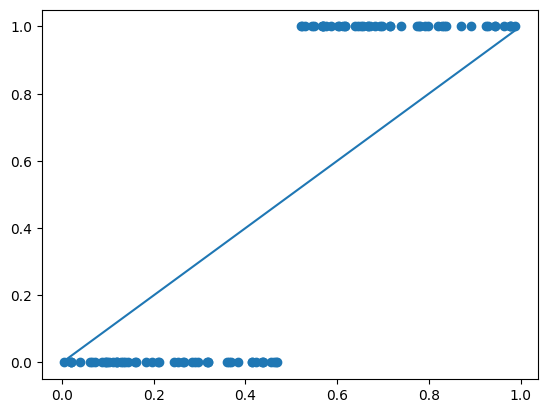

In [3]:
import matplotlib.pyplot as plt

# 绘制散点图
plt.scatter(X, Y)

# 初始化模型参数
w = 1
b = 0

# 计算模型的预测值
Z = w * X + b

# 绘制模型的直线
plt.plot(X, Z)

# 显示图形
plt.show()

我们来分析一下，结合激活函数，我们可以建立如下模型：

$$y=sigmoid(wx+b)$$

以上模型是个复合函数，可以表示为：

$$y=sigmoid(z)$$
$$z=wx+b$$

在上一节的机器学习中，使用均方误差梯度下降来学习，我们分别以w和b为变量来求导，然后用梯度下降调整参数，对预测值$\hat{y}$：

$$e=(y-\hat{y})^2$$

这里我们一样求$e$对$w$和$e$对$b$的导数，因为加上激活函数后模型成为复合函数，为了方便求导，用$a$来表示$\hat{y}$，

$$e=(y-a)^2$$

下面求$e$对$w$的导数和$e$对$b$的导数，使用链式法则来处理：

$$\frac{de}{dw}=\frac{de}{da}\cdot\frac{da}{dz}\cdot\frac{dz}{dw}$$

$$\frac{de}{db}=\frac{de}{da}\cdot\frac{da}{dz}\cdot\frac{dz}{db}$$

分别求每个函数的导数：

$$\frac{de}{da}=2(y-a)(-1)=-2(y-a)$$

$$\frac{da}{dz}=a(1-a)$$

$$\frac{dz}{dw}=x$$

$$\frac{dz}{db}=1$$

最终求导结果：

$$\frac{de}{dw}=\frac{de}{da}\cdot\frac{da}{dz}\cdot\frac{dz}{dw}=-2(y-a)a(1-a)x$$

$$\frac{de}{db}=\frac{de}{da}\cdot\frac{da}{dz}\cdot\frac{dz}{db}=-2(y-a)a(1-a)$$

梯度下降：

$$w=w-\alpha\cdot\frac{de}{dw}$$

$$b=b-\alpha\cdot\frac{de}{db}$$



以上对函数求导中，有很多人搞不懂$$\frac{da}{dz}=a(1-a)$$下面我们来推导一下，先把复合函数每部分都找出来：

$$a=\frac{1}{1+e^{-z}}=\frac{1}b$$
$$b=1+e^{-z}=1+c$$
$$c=e^{-z}=e^d$$
$$d=-z$$

用链式法则可以表示为

$$\frac{da}{dz}=\frac{da}{db}\cdot\frac{db}{dc}\cdot\frac{dc}{dd}\cdot\frac{dd}{dz}$$
分别求出对应的导数：
$$\frac{da}{db}=-b^{-2}$$
$$\frac{db}{dc}=1$$
$$\frac{dc}{dd}=e^d$$
$$\frac{dd}{dz}=-1$$

根据链式求导法则可以求得导数为$$\frac{da}{dz}=-(1+e^{-z})^{-2} \cdot 1 \cdot e^{-z} \cdot -1=\frac{e^{-z}}{(1+e^{-z})^2}=\frac{1}{1+e^{-z}}\cdot\frac{e^{-z}}{1+e^{-z}}=\frac{1}{1+e^{-z}}\cdot\frac{1+e^{-z}-1}{1+e^{-z}}=\frac{1}{1+e^{-z}}\cdot(\frac{1+e^{-z}}{1+e^{-z}}-\frac{1}{1+e^{-z}})=a(1-a)$$

下面开始实现学习:


第 1000000 次学习结果 w = 71.44724913562072, b = -35.365001139658816


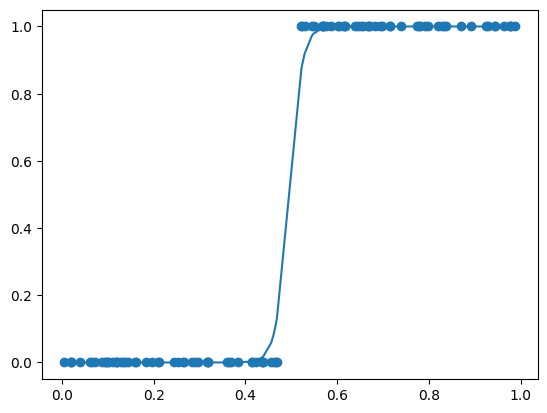

In [4]:
# 激活函数
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# 设置超参数学习率
alpha = 0.5
# 初始化参数权重w和截距b
w = 0
b = 0
# 设置超参数迭代次数
epochs = 10000

for m in range(epochs):
    for i in range(n):
        x = X[i]
        y = Y[i]
        y_pre = w * x + b
        a = sigmoid(y_pre)
        dw = -2 * (y - a) * a * (1 - a) * x
        db = -2 * (y - a) * a * (1 - a)
        w -= alpha * dw
        b -= alpha * db

print("第 {} 次学习结果 w = {}, b = {}".format(n * (m + 1), w, b))

y_pre = w * X + b
plt.scatter(X, Y)
# plt.plot(X, y_pre)
plt.plot(X, sigmoid(y_pre))
plt.show()

以上代码实现了简单的逻辑回归模型做二分类问题预测，但这并不是我们要的最终模型，我们最终要求的其实是分类的决策边界，决策边界是模型输出等于0.5时的点。对于逻辑回归模型，使用sigmoid函数，我们需要计算：$\sigma(w \cdot x + b) = 0.5$

由于：$ \sigma(z) = \frac{1}{1 + e^{-z}} $

因此，当 $\sigma(z) = 0.5$ 时，$z = 0$，即：$ w \cdot x + b = 0 $ $ x = -\frac{b}{w} $

为方便小伙伴们测试，整理完整代码如下：


第 1000000 次学习结果 w = 71.44724913562072, b = -35.365001139658816


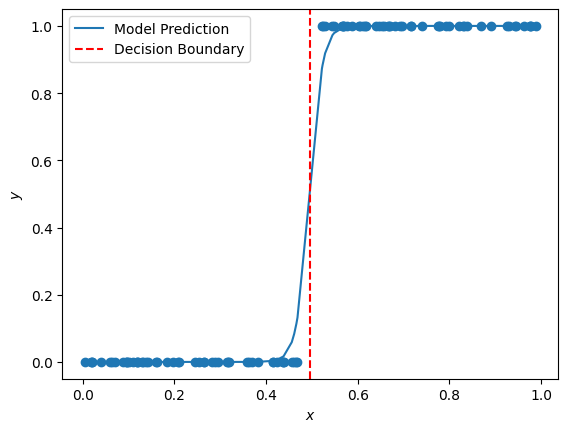

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# 生成数据集的函数
def get_data(counts, seed=0):
    # 设置随机数种子，保证每次生成的数据集相同
    np.random.seed(seed)
    # 生成随机的 x 值，并进行排序
    xs = np.sort(np.random.rand(counts))
    # 初始化 y 值的数组
    ys = np.zeros(counts)
    # 遍历 x 值数组，生成对应的 y 值
    for i, x in enumerate(xs):
        # 生成正态分布的扰动，模拟真实数据中的噪声
        noise = np.random.normal(scale=0.01)
        # 计算 y 值，加入噪声
        yi = x + noise
        # 将 y 值转换为 0 或 1，用于二分类问题
        ys[i] = int(yi > 0.5)
    return xs, ys

# sigmoid 激活函数
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# 数据大小
n = 100
# 生成数据集
X, Y = get_data(n)

# 设置超参数：学习率
alpha = 0.5
# 初始化参数：权重 w 和截距 b
w = 0
b = 0
# 设置超参数：迭代次数
epochs = 10000

# 迭代训练模型
for m in range(epochs):
    # 遍历数据集中的每个样本
    for i in range(n):
        x = X[i]
        y = Y[i]
        # 计算模型的输出值 y_pre 和激活值 a
        y_pre = w * x + b
        a = sigmoid(y_pre)
        # 计算参数的梯度 dw 和 db
        dw = -2 * (y - a) * a * (1 - a) * x
        db = -2 * (y - a) * a * (1 - a)
        # 更新参数 w 和 b
        w -= alpha * dw
        b -= alpha * db

# 输出最终训练结果
print("第 {} 次学习结果 w = {}, b = {}".format(n * (m + 1), w, b))

# 计算模型的预测结果并可视化
y_pre = w * X + b
plt.scatter(X, Y)
# plt.plot(X, y_pre)
plt.plot(X, sigmoid(y_pre), label='Model Prediction')

# 计算决策边界
decision_boundary = -b / w
plt.axvline(x=decision_boundary, color='r', linestyle='--', label='Decision Boundary')

plt.xlabel("$x$")
plt.ylabel("$y$")
plt.legend()
plt.show()

<div class="alert alert-warning">
在项目目录中有一个文件<code>ML03.py</code>是以上代码增加了动态绘制的动画，你可以用python运行看看效果，这样能更直观的感受训练的过程。
</div>


本节课的代码是最简单的逻辑回归模型的实现，这里大家一样可以修改超参数看看训练效果。

在后续的课程中我们会对上以代码做优化，如：

1. 使用矩阵运算代替循环：在代码中，每次迭代都需要遍历整个数据集，对每个样本进行计算和更新。这种方式效率比较低下，可以使用矩阵运算来代替循环，从而提高计算效率。
2. 使用随机梯度下降算法：在代码中，每次迭代都需要遍历整个数据集，这种方式计算量比较大，可以使用随机梯度下降算法，每次只随机选取一个样本进行计算和更新，从而减少计算量。
3. 添加正则化项：在代码中，没有添加正则化项，可能会导致模型过拟合。可以添加正则化项，限制模型的复杂度，从而提高泛化能力。
4. 使用更好的初始化方式：在代码中，参数权重 w 和截距 b 都是初始化为 0，这种方式可能会导致模型收敛速度比较慢。可以使用更好的初始化方式，比如 Xavier 初始化或 He 初始化，从而加速模型的收敛。
5. 使用其他优化算法：在代码中，使用的是简单的梯度下降算法，可以使用其他优化算法，比如 Adam 算法、RMSProp 算法等，从而加速模型的收敛。

在学习优化之前，我们先基于目前掌握的知识，看看如下面的数据集：

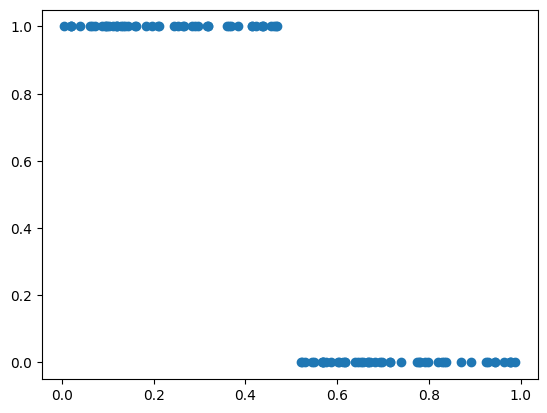

In [6]:
import numpy as np

# 生成数据集的函数
def get_data(counts, seed=0):
    # 设置随机数种子，保证每次生成的数据集相同
    np.random.seed(seed)
    # 生成随机的 x 值，并进行排序
    xs = np.sort(np.random.rand(counts))
    # 初始化 y 值的数组
    ys = np.zeros(counts)
    # 遍历 x 值数组，生成对应的 y 值
    for i, x in enumerate(xs):
        # 生成正态分布的扰动，模拟真实数据中的噪声
        noise = np.random.normal(scale=0.01)
        # 计算 y 值，加入噪声
        yi = x + noise
        # 将 y 值转换为 0 或 1，用于二分类问题
        ys[i] = int(yi < 0.5)
    return xs, ys

# 数据大小
n = 100
# 生成数据集
X, Y = get_data(n)

# 打印数据集
# print("X:", X)
# print("Y:", Y)

# 绘制散点图
plt.scatter(X, Y)
plt.show()

第 1000000 次学习结果 w = -71.44724913562065, b = 35.36500113965878


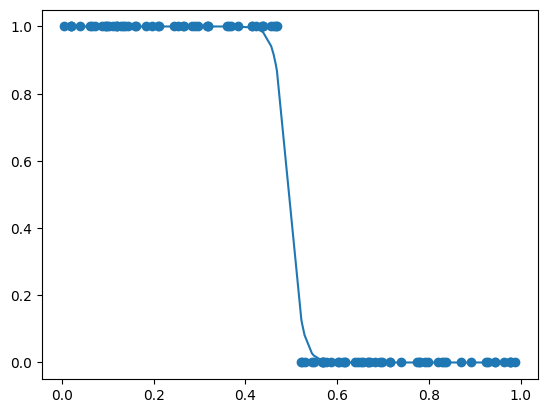

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# 生成数据集的函数
def get_data(counts, seed=0):
    # 设置随机数种子，保证每次生成的数据集相同
    np.random.seed(seed)
    # 生成随机的 x 值，并进行排序
    xs = np.sort(np.random.rand(counts))
    # 初始化 y 值的数组
    ys = np.zeros(counts)
    # 遍历 x 值数组，生成对应的 y 值
    for i, x in enumerate(xs):
        # 生成正态分布的扰动，模拟真实数据中的噪声
        noise = np.random.normal(scale=0.01)
        # 计算 y 值，加入噪声
        yi = x + noise
        # 将 y 值转换为 0 或 1，用于二分类问题
        ys[i] = int(yi < 0.5)
    return xs, ys

# sigmoid 激活函数
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# 数据大小
n = 100
# 生成数据集
X, Y = get_data(n)

# 设置超参数：学习率
alpha = 0.5
# 初始化参数：权重 w 和截距 b
w = 0
b = 0
# 设置超参数：迭代次数
epochs = 10000

# 迭代训练模型
for m in range(epochs):
    # 遍历数据集中的每个样本
    for i in range(n):
        x = X[i]
        y = Y[i]
        # 计算模型的输出值 y_pre 和激活值 a
        y_pre = w * x + b
        a = sigmoid(y_pre)
        # 计算参数的梯度 dw 和 db
        dw = -2 * (y - a) * a * (1 - a) * x
        db = -2 * (y - a) * a * (1 - a)
        # 更新参数 w 和 b
        w -= alpha * dw
        b -= alpha * db

# 输出最终训练结果
print("第 {} 次学习结果 w = {}, b = {}".format(n * (m + 1), w, b))

# 计算模型的预测结果并可视化
y_pre = w * X + b
plt.scatter(X, Y)
# plt.plot(X, y_pre)
plt.plot(X, sigmoid(y_pre))
plt.show()

以上数据集只是把数据从`>0.5`的分类为1改为`<0.5`的分类为1，对模型不需任何修改，正常分类，从训练结果可以看只是模型参数w从71.45变为-71.45。

再看看能不能解决更复杂的分类问题，如下数据集：

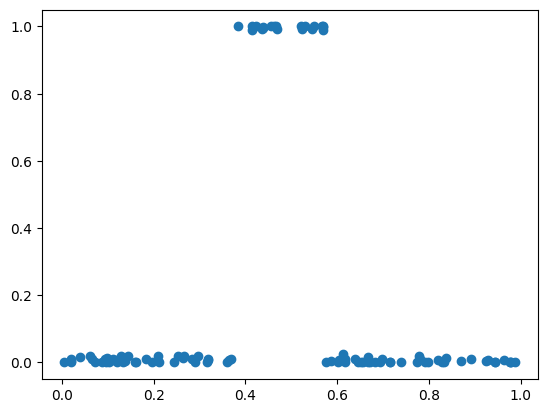

In [9]:
import numpy as np

# 生成数据集的函数
def get_data(counts, seed=0):
    # 设置随机数种子，保证每次生成的数据集相同
    np.random.seed(seed)
    # 生成随机的 x 值，并进行排序
    xs = np.sort(np.random.rand(counts))
    # 初始化 y 值的数组
    ys = np.zeros(counts)
    # 计算中间部分的索引范围
    mid = int(counts * 0.4), int(counts * 0.6)
    # 将中间部分的 y 值设为 1
    ys[mid[0]:mid[1]] = 1
    # 加入噪声
    ys += np.random.normal(scale=0.01, size=counts)
    # 将 y 值限制在 0 和 1 之间
    ys = np.clip(ys, 0, 1)
    return xs, ys

# 数据大小
n = 100
# 生成数据集
X, Y = get_data(n)

# 打印数据集
# print("X:", X)
# print("Y:", Y)

# 绘制散点图
plt.scatter(X, Y)
plt.show()

第 1000000 次学习结果 w = -1.154305695213669, b = -1.1708057735335682


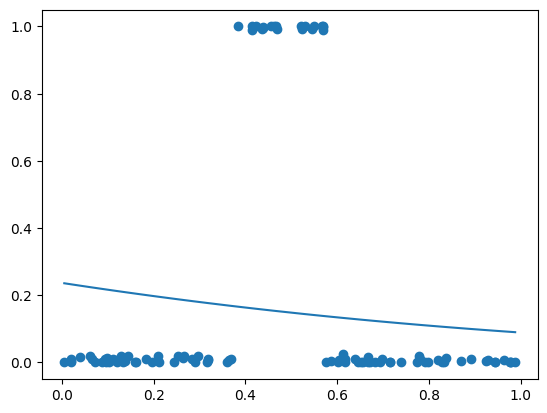

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# 生成数据集的函数
def get_data(counts, seed=0):
    # 设置随机数种子，保证每次生成的数据集相同
    np.random.seed(seed)
    # 生成随机的 x 值，并进行排序
    xs = np.sort(np.random.rand(counts))
    # 初始化 y 值的数组
    ys = np.zeros(counts)
    # 计算中间部分的索引范围
    mid = int(counts * 0.4), int(counts * 0.6)
    # 将中间部分的 y 值设为 1
    ys[mid[0]:mid[1]] = 1
    # 加入噪声
    ys += np.random.normal(scale=0.01, size=counts)
    # 将 y 值限制在 0 和 1 之间
    ys = np.clip(ys, 0, 1)
    return xs, ys

# sigmoid 激活函数
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# 数据大小
n = 100
# 生成数据集
X, Y = get_data(n)

# 设置超参数：学习率
alpha = 0.5
# 初始化参数：权重 w 和截距 b
w = 0
b = 0
# 设置超参数：迭代次数
epochs = 10000

# 迭代训练模型
for m in range(epochs):
    # 遍历数据集中的每个样本
    for i in range(n):
        x = X[i]
        y = Y[i]
        # 计算模型的输出值 y_pre 和激活值 a
        y_pre = w * x + b
        a = sigmoid(y_pre)
        # 计算参数的梯度 dw 和 db
        dw = -2 * (y - a) * a * (1 - a) * x
        db = -2 * (y - a) * a * (1 - a)
        # 更新参数 w 和 b
        w -= alpha * dw
        b -= alpha * db

# 输出最终训练结果
print("第 {} 次学习结果 w = {}, b = {}".format(n * (m + 1), w, b))

# 计算模型的预测结果并可视化
y_pre = w * X + b
plt.scatter(X, Y)
# plt.plot(X, y_pre)
plt.plot(X, sigmoid(y_pre))
plt.show()

从训练结果看，很明显$y=sigmoid(wx+b)$模型已经解决不了这个问题了，不管怎么调整超参数都没用，怎么办？请关注下节课**神经网络**。
